In [ ]:
#pytorch workflow fundamentals
#find the url here: https://www.learnpytorch.io/01_pytorch_workflow/

In [ ]:
import torch
from torch import nn
#nn contails all of pytorchs building blocks for neural networks
import matplotlib.pyplot as plt

In [ ]:
print(torch.__version__)

2.1.0+cu121


### Data (preparing and loading)

Machine learning is a game of two parts:

1. Turn your data, whatever it is, **into numbers** (a representation).
2. Pick or build a model to **learn the representation** as best as possible.

In [ ]:
#let's create our data as straight line
weight = 0.7
bias = 0.3

#create data
start = 0
end = 1
step = 0.02


In [ ]:
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Beautiful! Now we're going to move towards building a model that can learn the relationship between X **(features)** and y **(labels)**.

In [ ]:
#create train/test split
#use 80% of data for trianing set and 20% for testing set
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
#create a function to visualize the predictions
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots trainign data, test data and compares predictions
  """

  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

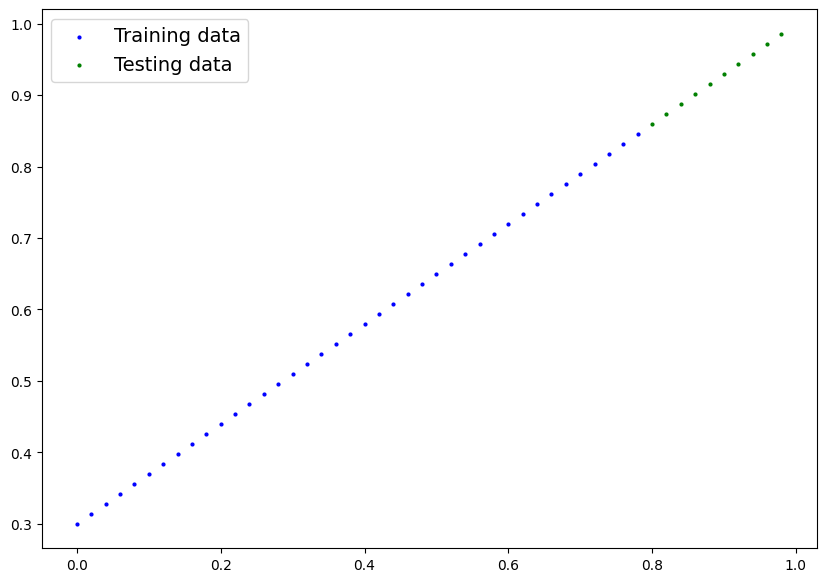

In [ ]:
plot_predictions()

## 2. Build Model

In [ ]:
#create a linear regression model class
class LinearRegressionModel(nn.Module):
    #almost everything in pytorch is a nn.Module; think of it as a neural network lego block
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, #start with a random value as weight
                                                dtype=torch.float #pytroch prefers floar 32 by default
                                                ),
                                    requires_grad=True) #allows to update the values with gradient descent
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor)-> torch.Tensor:
        #here x is the input data
        return self.weights*x + self.bias


### Pytorch model building essentials

PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.


They are `torch.nn`, `torch.optim`, `torch.utils.data.Dataset` and `torch.utils.data.DataLoader`. For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

- `torch.nn`: Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).
- `torch.nn.Parameter`: Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via [gradient descent](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)) are calculated automatically, this is often referred to as "autograd".
- `torch.nn.Module`: The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented.
- `torch.optim`: Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss).
- `def forward()`: All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. the linear regression formula above).


If the above sounds complex, think of like this, almost everything in a PyTorch neural network comes from `torch.nn`,

- `nn.Module` contains the larger building blocks (layers)
- `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make `nn.Module`(s))
- `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within `nn.Module`(s)
- `torch.optim` contains optimization methods on how to improve the parameters within `nn.Parameter` to better represent input data


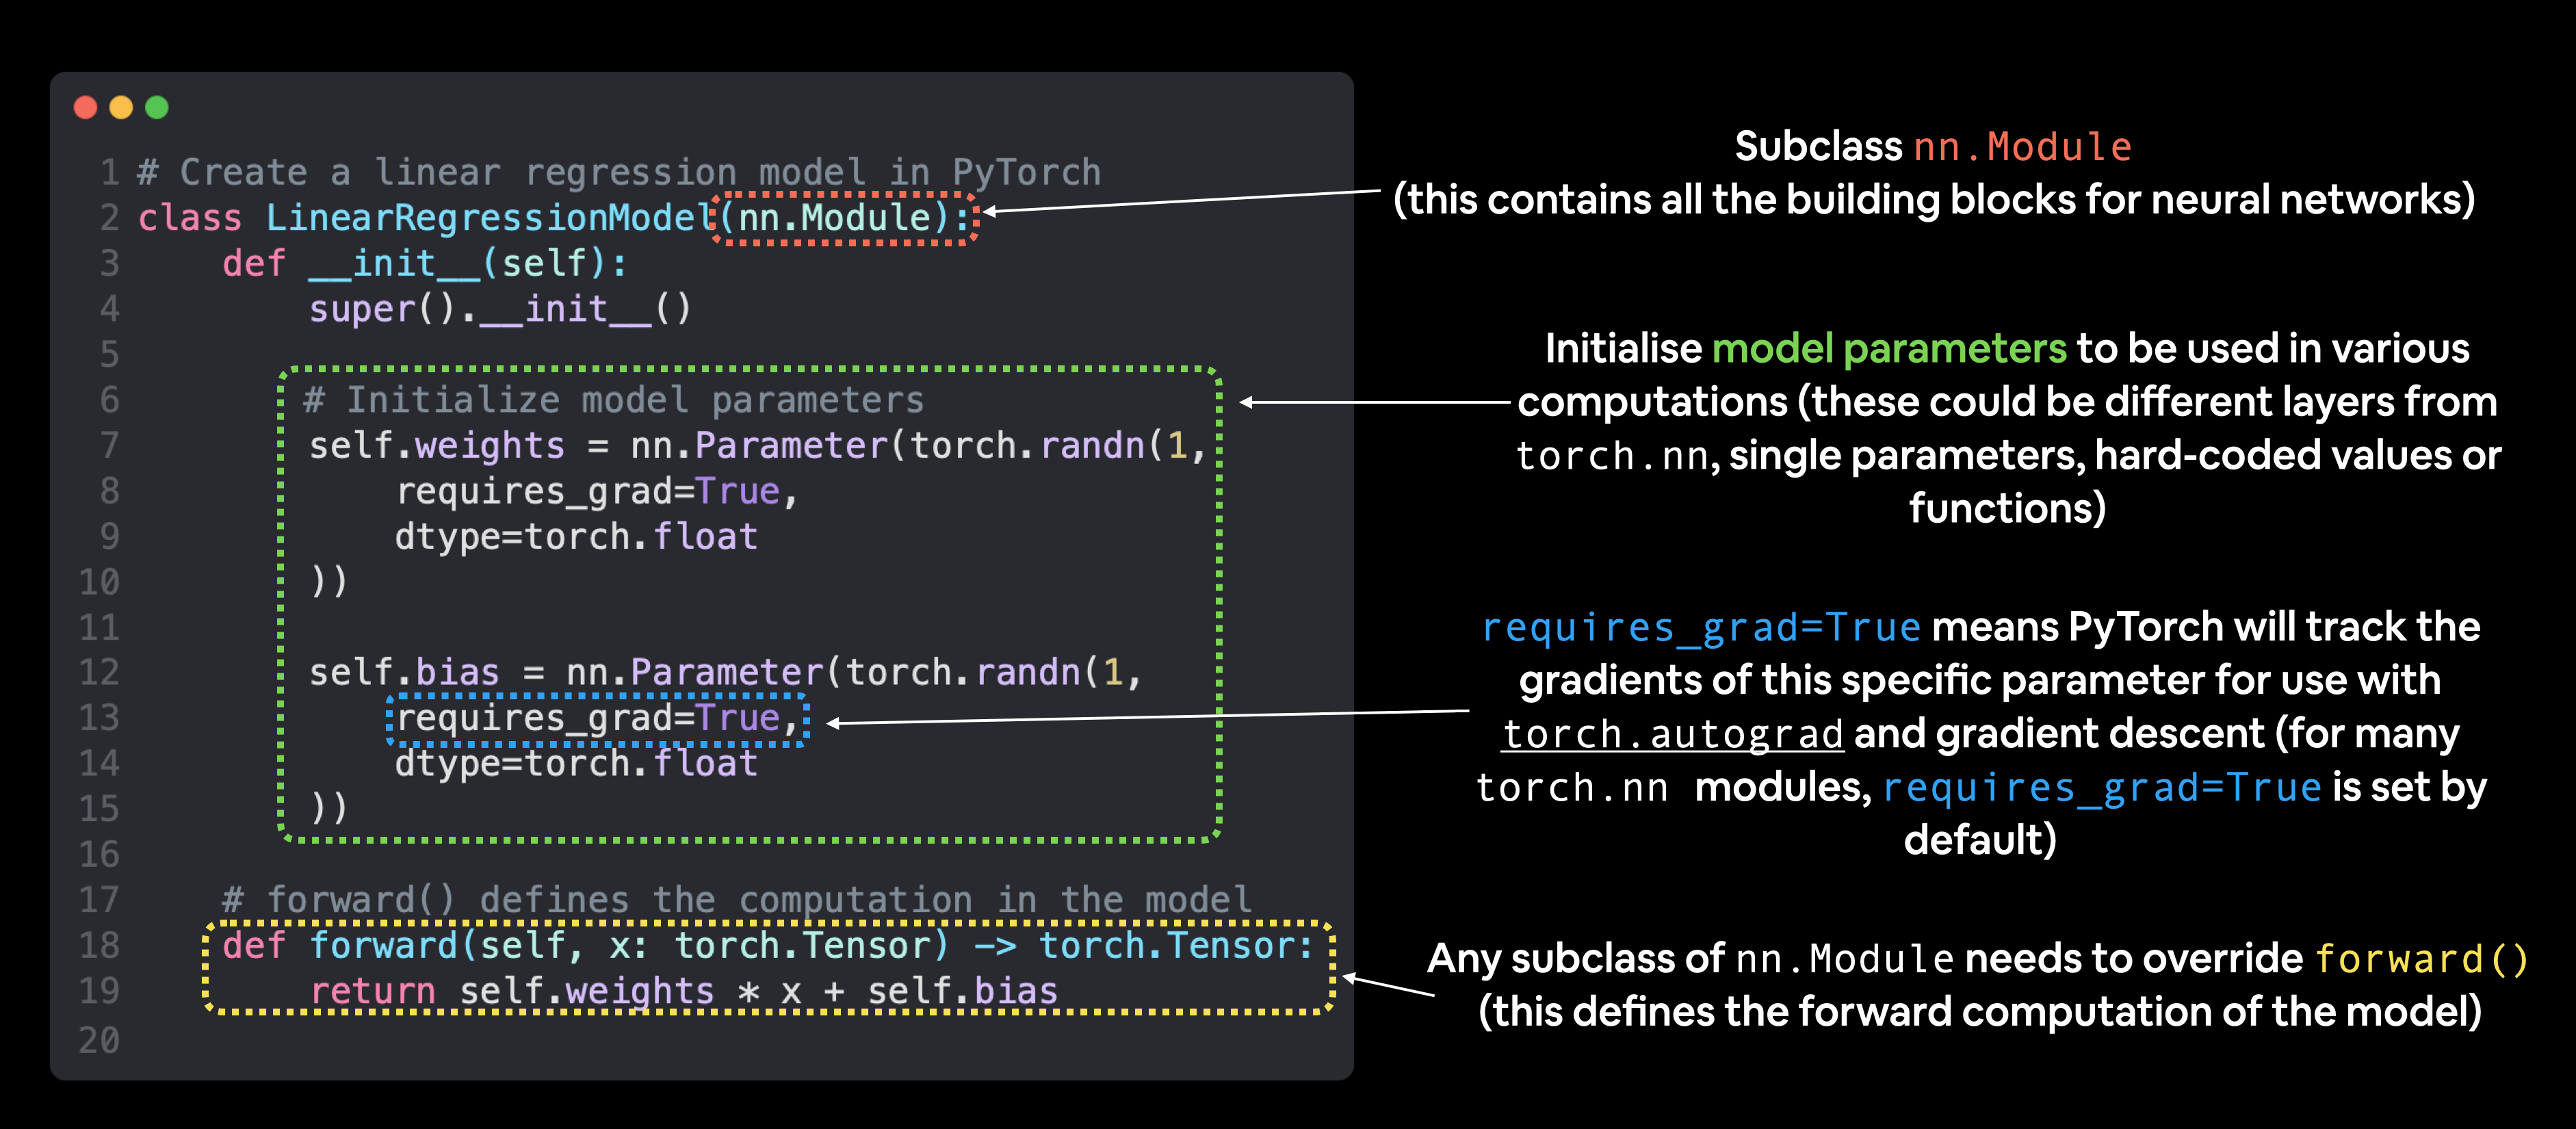

### Checking the contents of a pytorch model
- Once we create a model instance with the class we have made, we can check its parameters using `.parameters()`

In [ ]:
#set manual seed since nn.Paramter are randomly initialized
torch.manual_seed(42)
#create an instance of the model
#this is a subclass of nn.Module that contains nn.Parameter(s)
model_0 = LinearRegressionModel()

#check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
def parameter_print(seed):
    #set manual seed since nn.Paramter are randomly initialized
    torch.manual_seed(seed)
    #create an instance of the model
    #this is a subclass of nn.Module that contains nn.Parameter(s)
    model_0 = LinearRegressionModel()

    #check the nn.Parameter(s) within the nn.Module subclass we created
    print(f"For seed:{seed}, you get: {list(model_0.parameters())}")

In [ ]:
parameter_print(42)
parameter_print(41)
parameter_print(40)

For seed:42, you get: [Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
For seed:41, you get: [Parameter containing:
tensor([0.7906], requires_grad=True), Parameter containing:
tensor([-0.6410], requires_grad=True)]
For seed:40, you get: [Parameter containing:
tensor([0.9307], requires_grad=True), Parameter containing:
tensor([-0.3482], requires_grad=True)]


We can also get the state (what the model contains) of the model using `.state_dict()`



In [ ]:
#list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making Predictions using `torch.inference_mode()`
- lets make some predicitons

In [ ]:
#make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

#not in older pytorch code you might also see torch.no_grad()
#with torch.no_grad():
# y_preds = model_0(X_test)

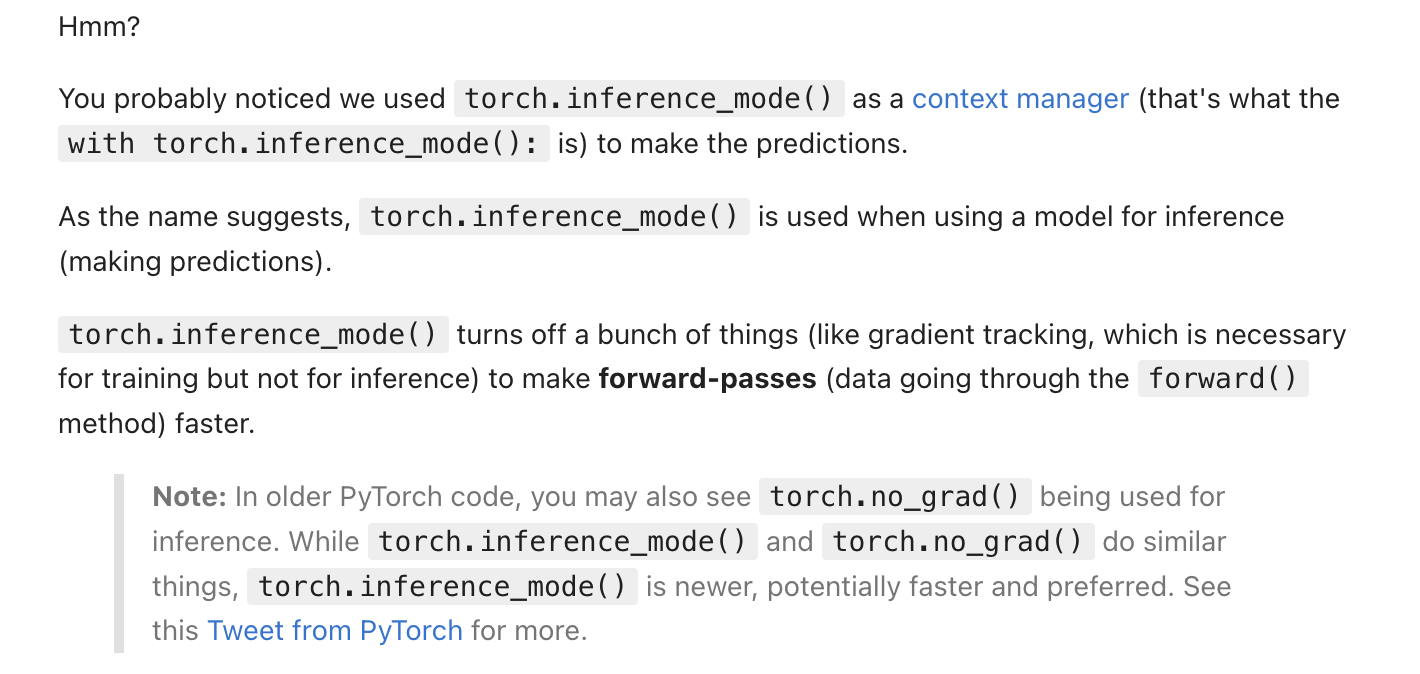

In [ ]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


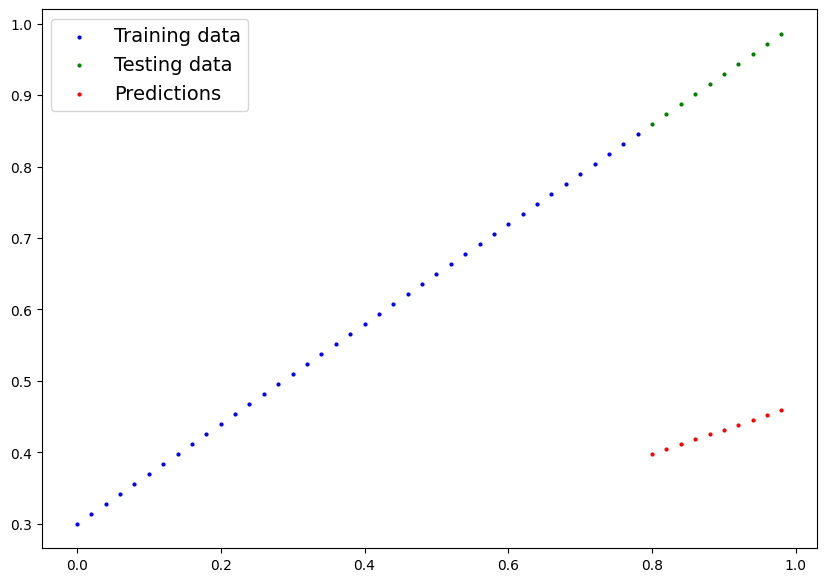

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train Model

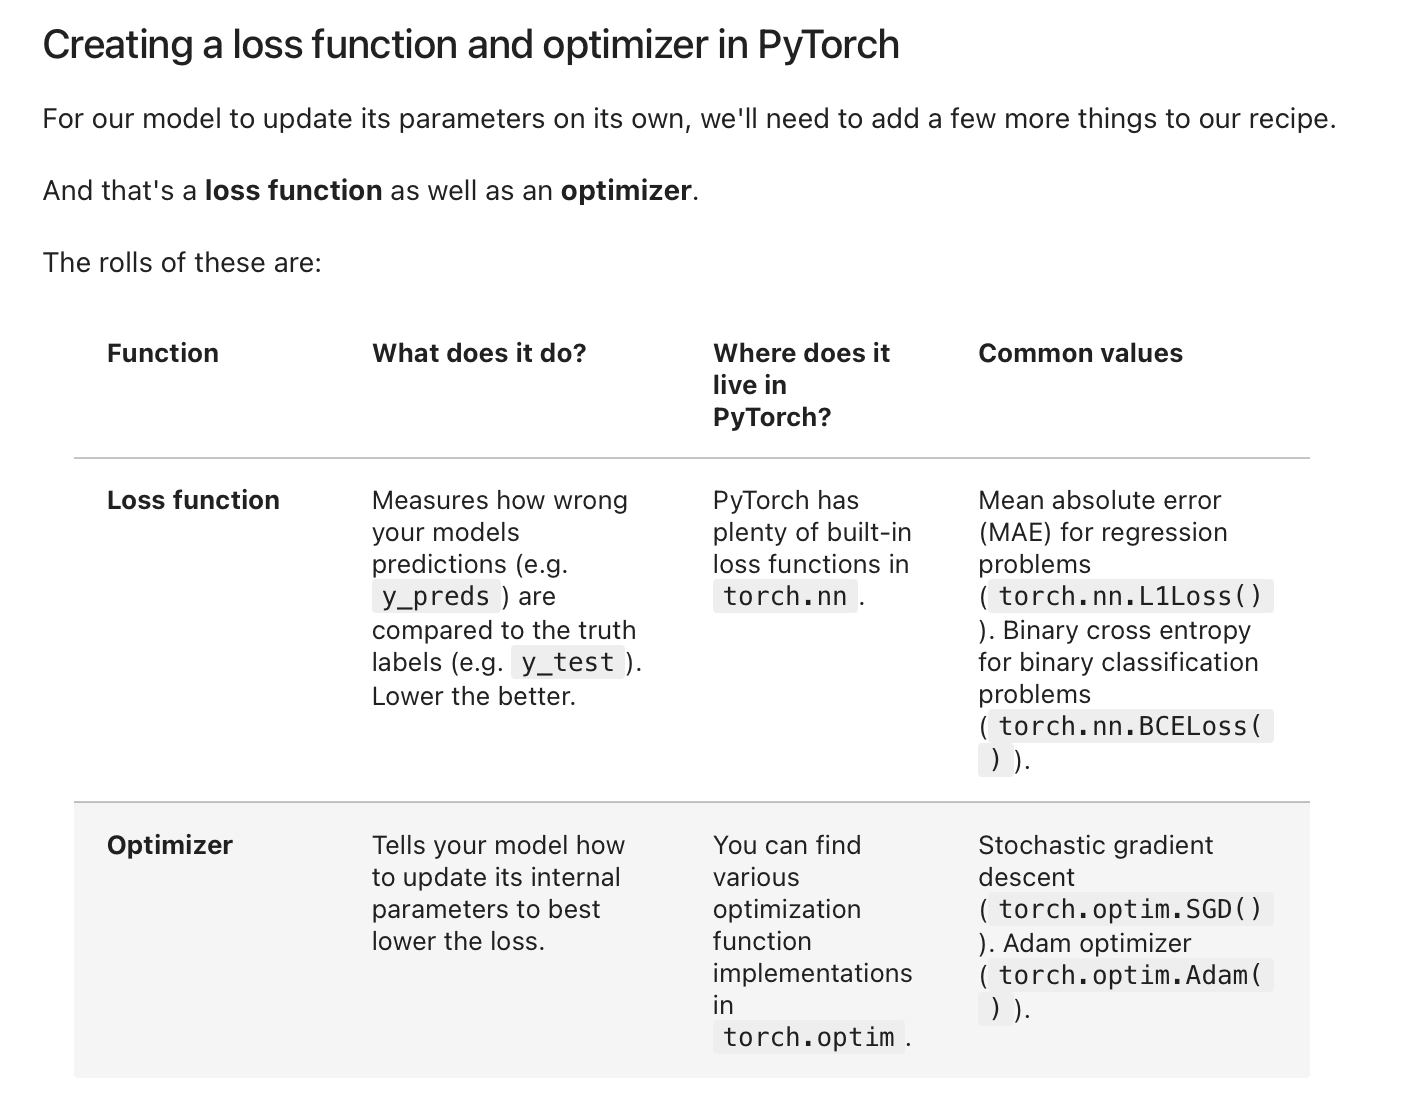

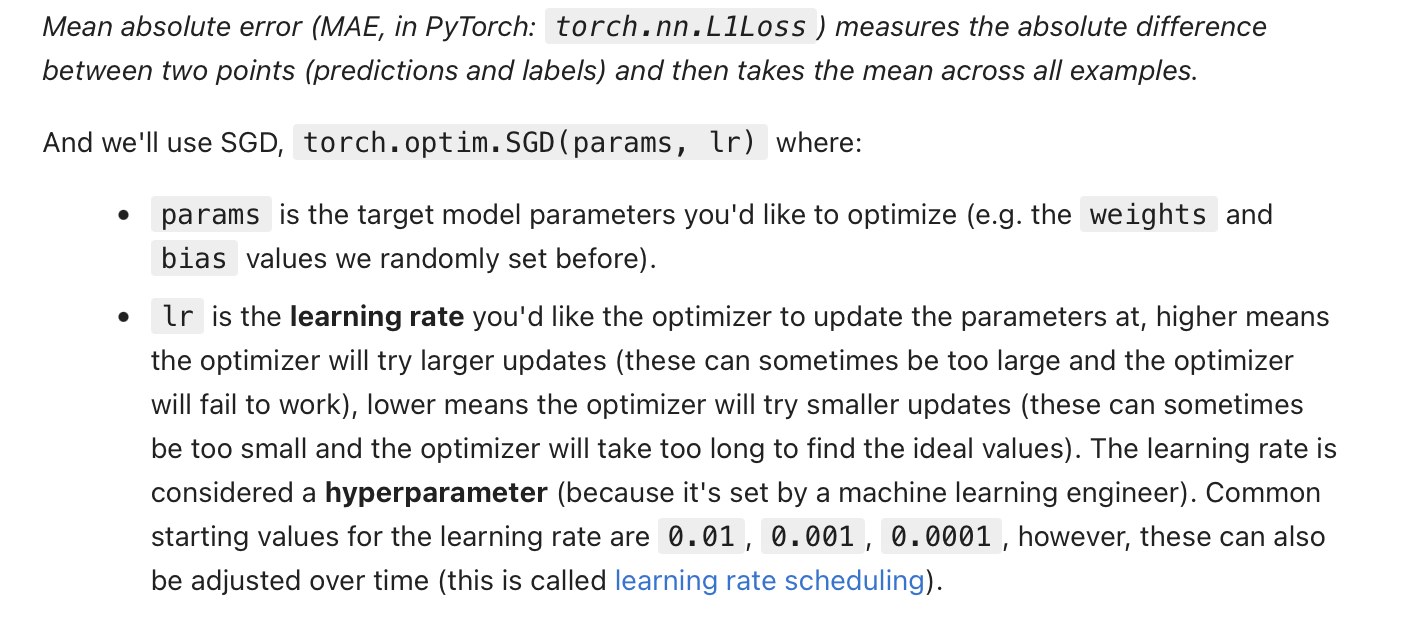

In [ ]:
#create the loss function
#MAE loss it same as L1 Loss
loss_fn = nn.L1Loss()

#Create the optimizer
optimizer = torch.optim.SGD(
    params = model_0.parameters(), #parameters of target model to optimize
    lr = 0.01, #learning rate
)

### Creating an optimization loop in PyTorch

- now it's time to create a **training loop**.
- The training loop involves the model going through the training data and learning the relationships between the `features` and `labels`.
- The testing loop involves going through the testing data and evaluating how good the patterns are that the model learned on the training data (the model never see's the testing data during training).
- Each of these is called a "loop" because we want our model to look (loop through) at each sample in each dataset.



### Pytorch Training Loop

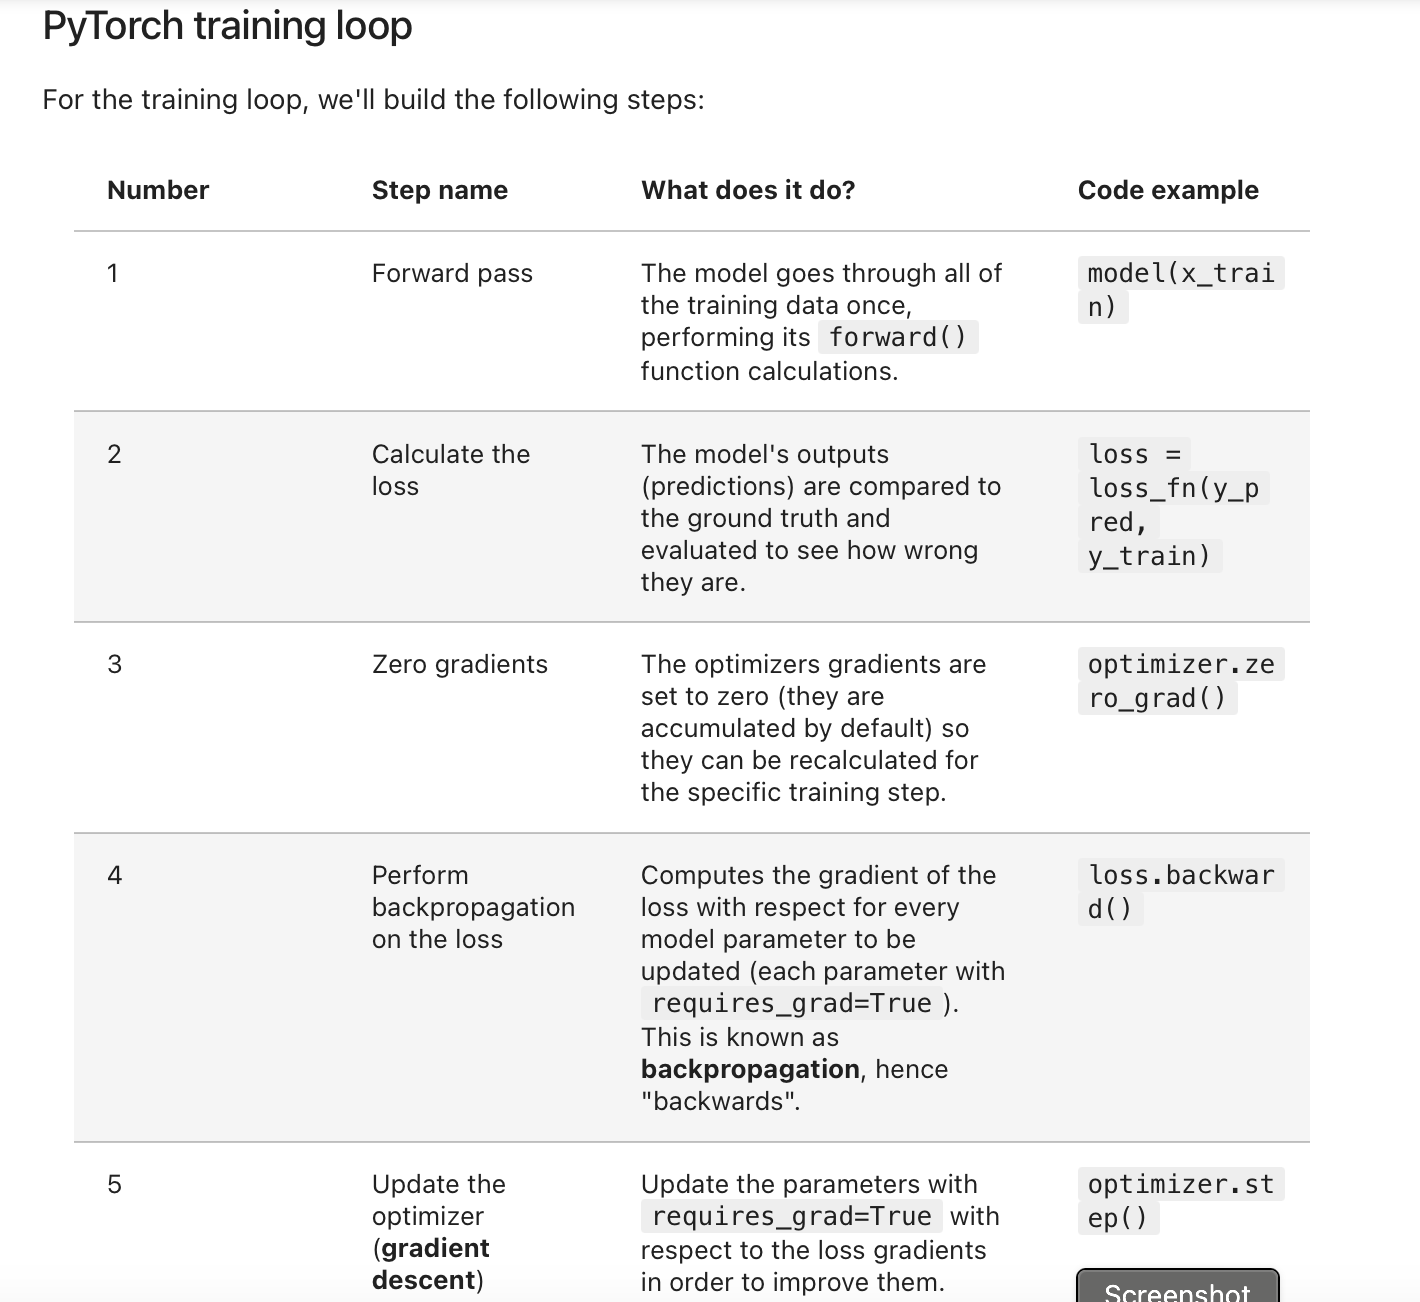

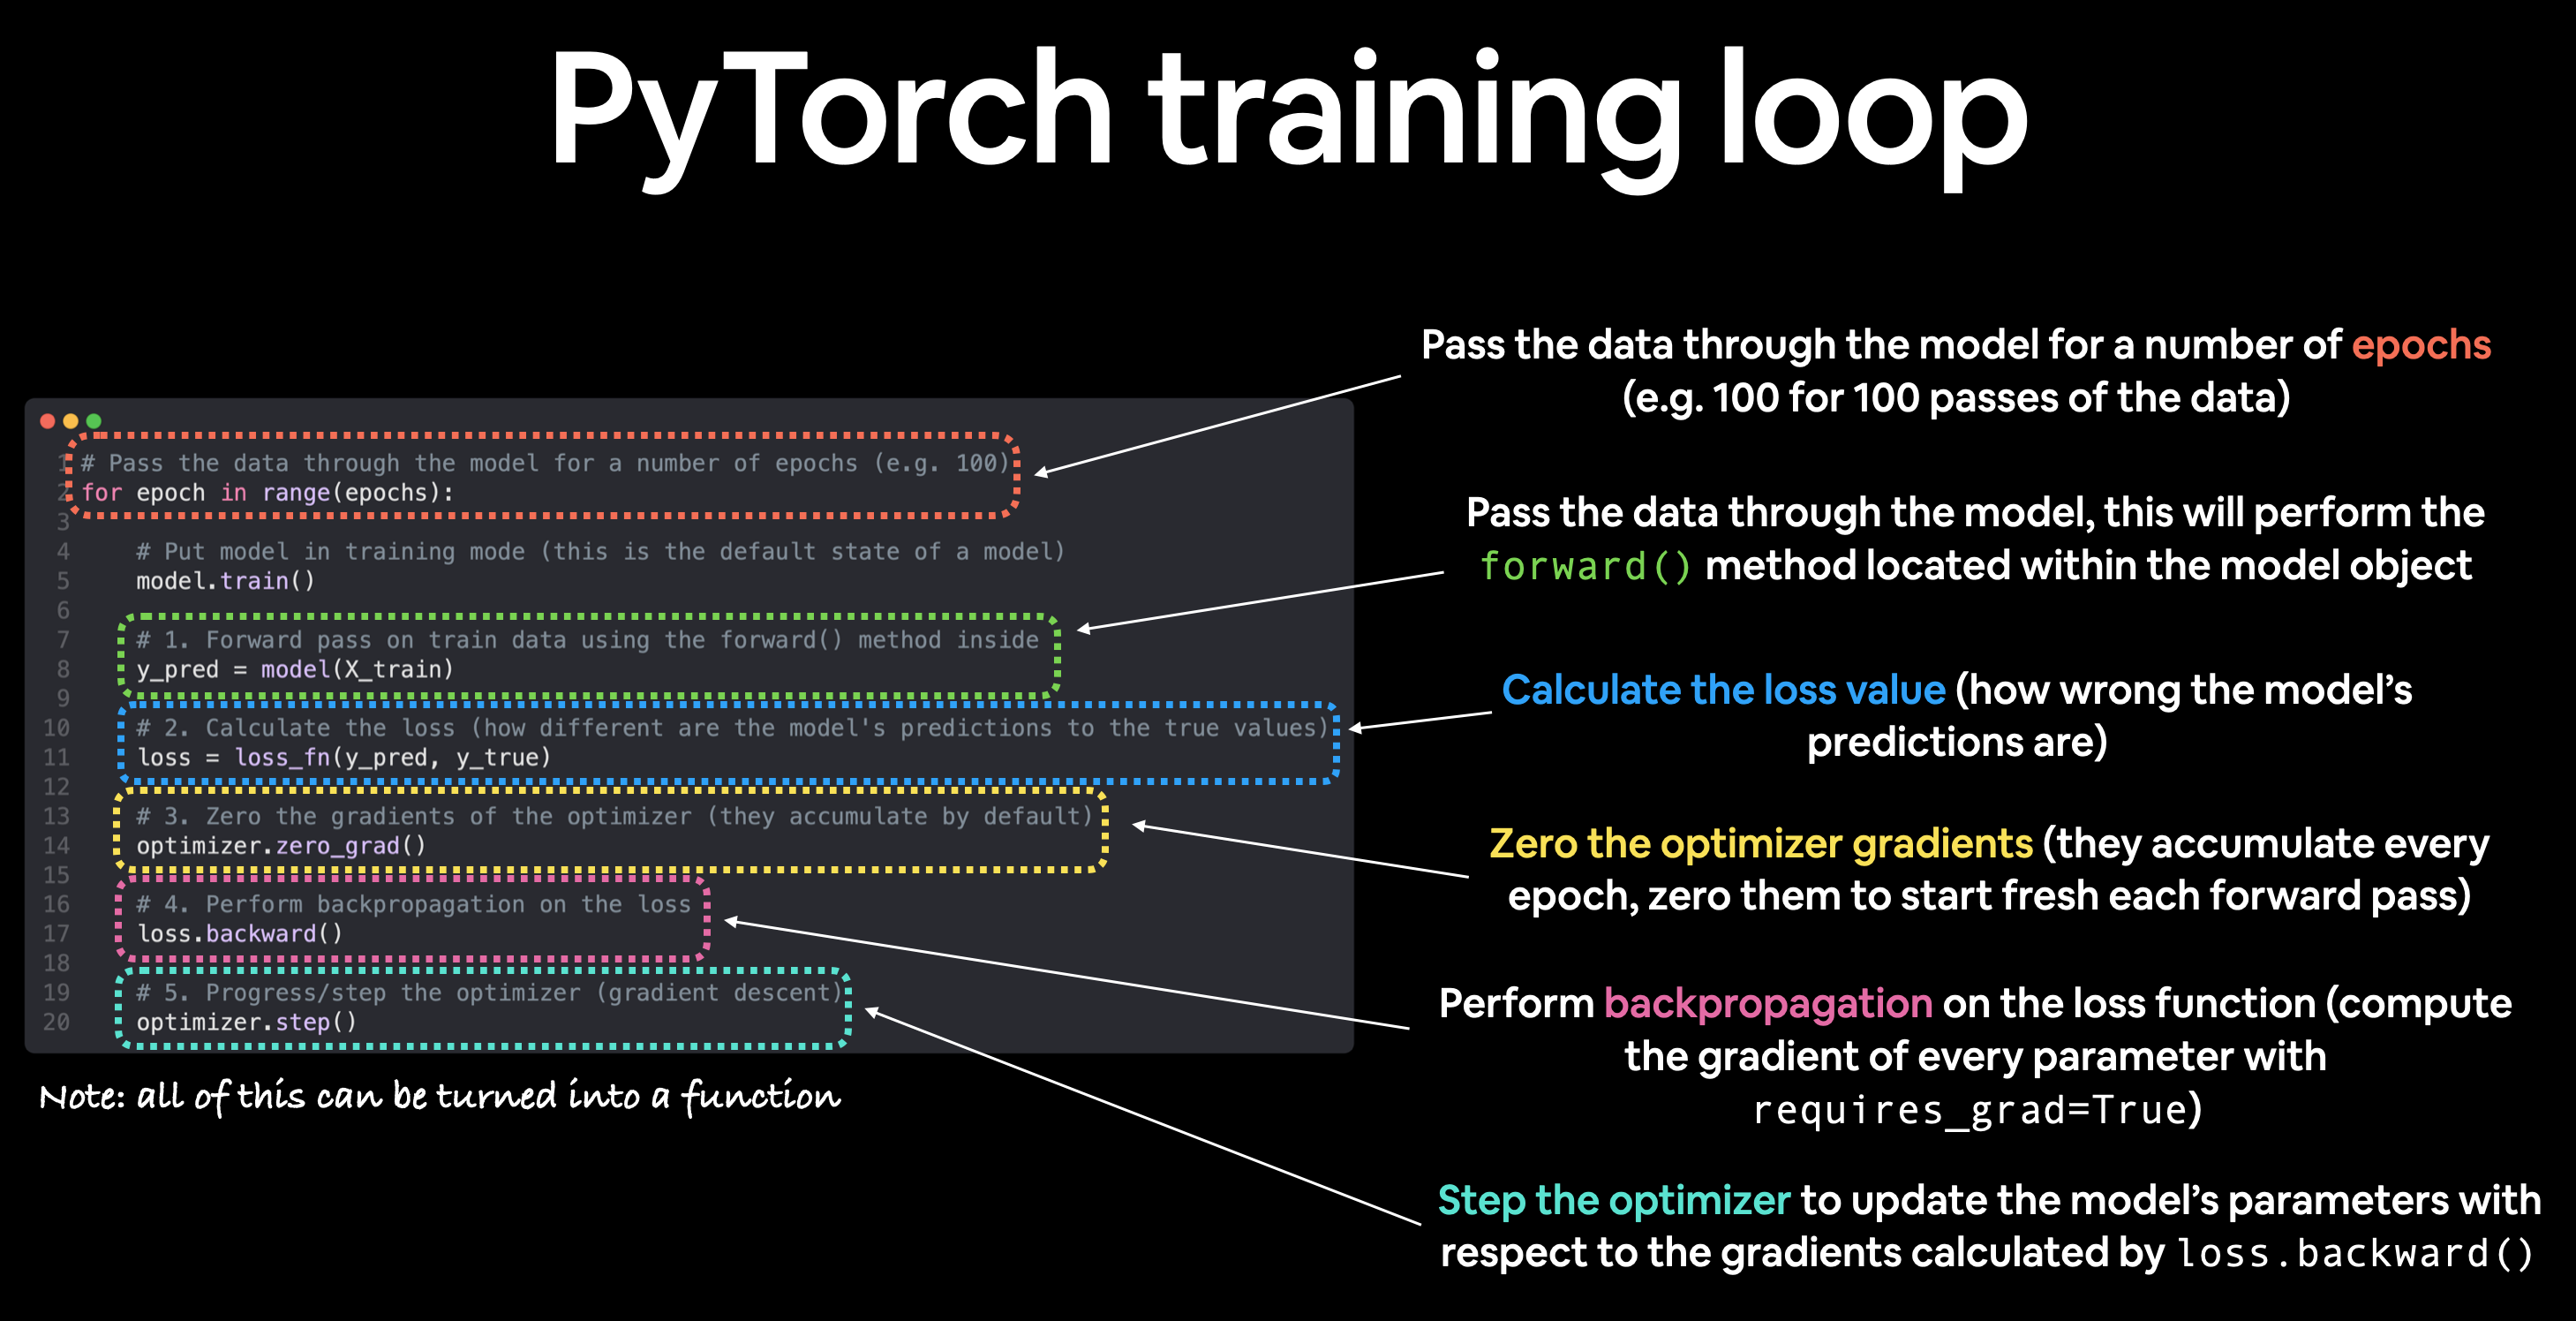

### Pytorch Testing Loop

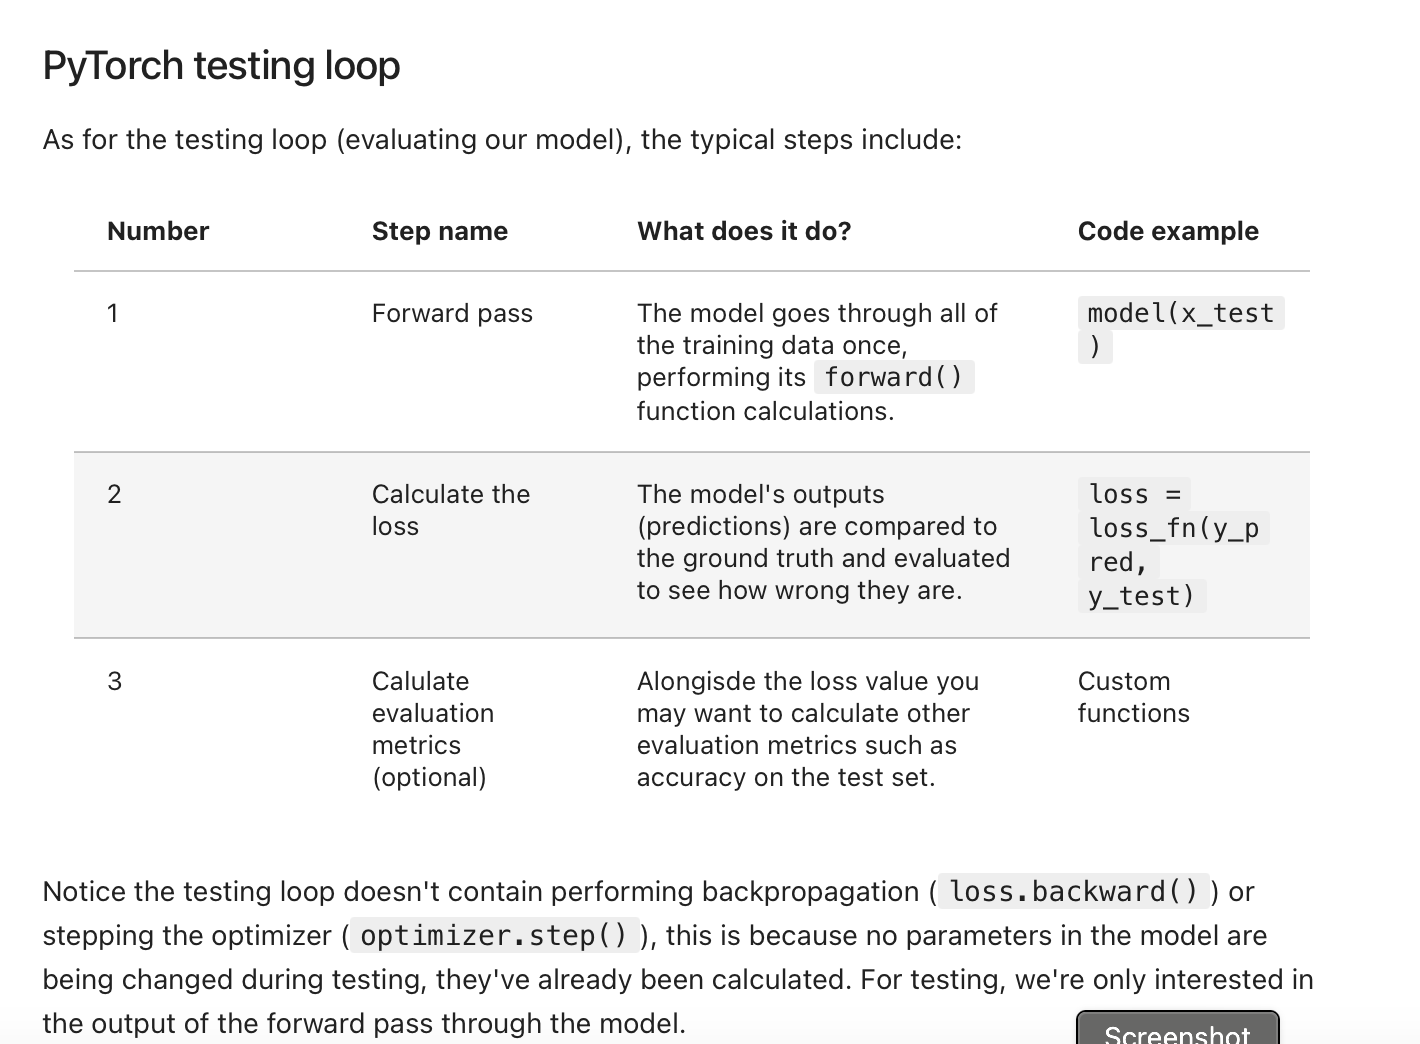

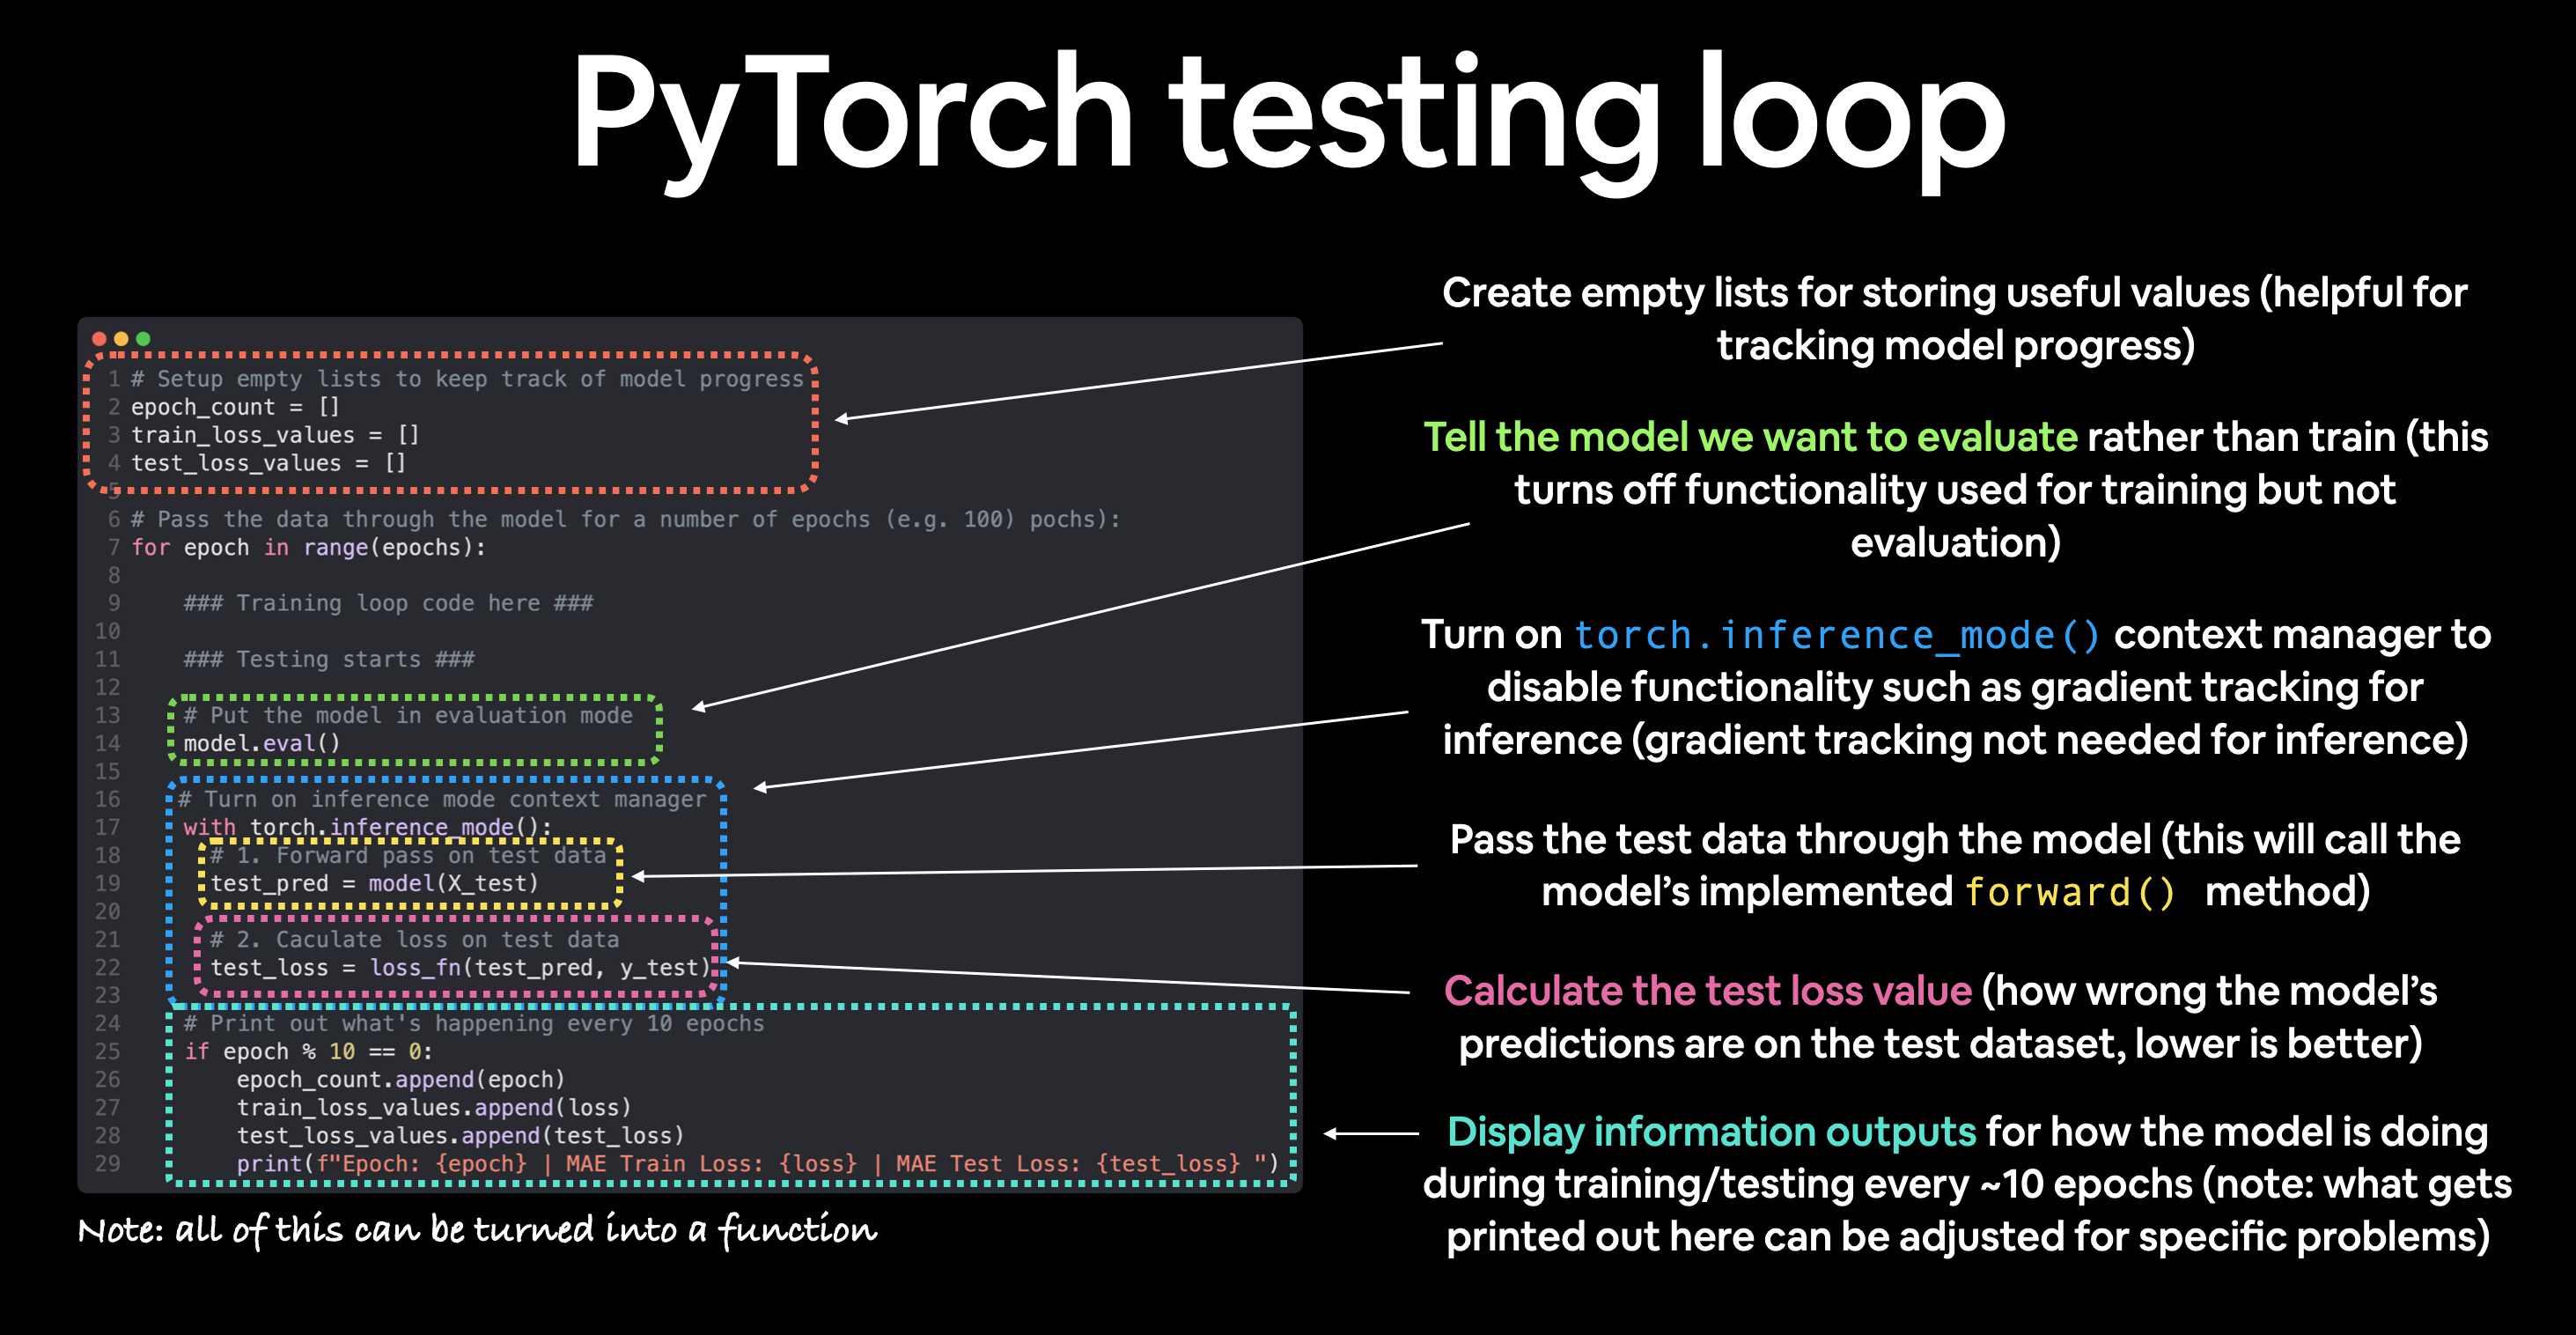

In [40]:
#lets put together both training and testing and train our model for 100 epochs
#and evaluate every 10 epochs
torch.manual_seed(42)
#set the number of epochs
epochs = 100
#create empty loss lists to track value
train_loss_values = []
test_loss_values = []

epoch_count = []

for epoch in range(epochs):
    #Training

    #put model in training mode (this is the default state of a model)
    model_0.train()

    #1. forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)

    #2. calculate loss
    loss = loss_fn(y_pred, y_train)

    #3. zero grad of the optimizer
    optimizer.zero_grad()

    #4. Loss Backwards
    loss.backward()

    #5. progress the optimizer
    optimizer.step()

    #Testing
    #put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():

        #1. Forward Pass on Test Data
        test_pred = model_0(X_test)

        #2. Calculate loss on test data
        # predictions come in torch.float datatype,
        #so comparisons need to be done with tensors of the same type
        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        #print out what's happening
        if epoch%10==0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())

            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 


Oh would you look at that! Looks like our loss is going down with every epoch, let's plot it to find out.



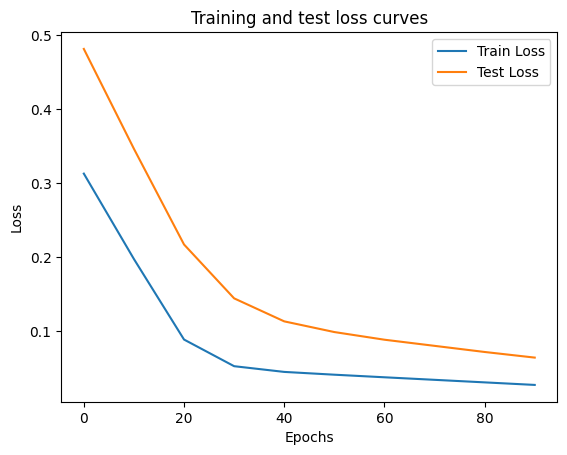

In [42]:
#plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

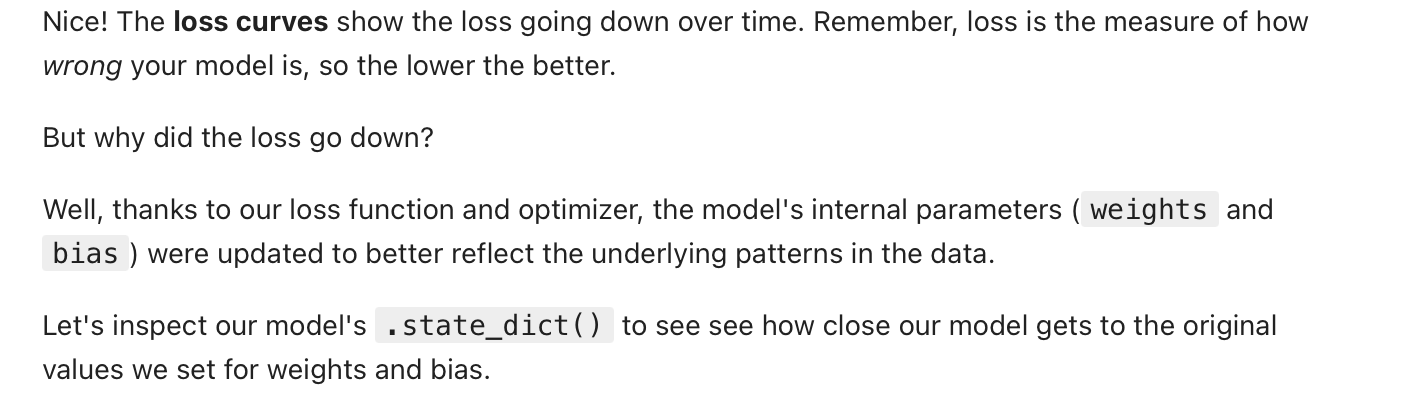

In [43]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


This is the whole idea of machine learning and deep learning, **there are some ideal values that describe our data** and rather than figuring them out by hand, **we can train a model to figure them out programmatically**.



## 4. Making predictions with a trained PyTorch model (inference)



Once you've trained a model, you'll likely want to make predictions with it.

We've already seen a glimpse of this in the training and testing code above, the steps to do it outside of the training/testing loop are similar.

There are three things to remember when making predictions (also called performing inference) with a PyTorch model:

1. Set the model in evaluation mode (`model.eval()`).
2. Make the predictions using the inference mode context manager (`with torch.inference_mode(): ...`).
3. All predictions should be made with objects on the same device (e.g. data and model on GPU only or data and model on CPU only).

The first two items make sure all helpful calculations and settings PyTorch uses behind the scenes during training but aren't necessary for inference are turned off (this results in faster computation). And the third ensures that you won't run into cross-device errors.


In [44]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

Nice! We've made some predictions with our trained model, now how do they look?

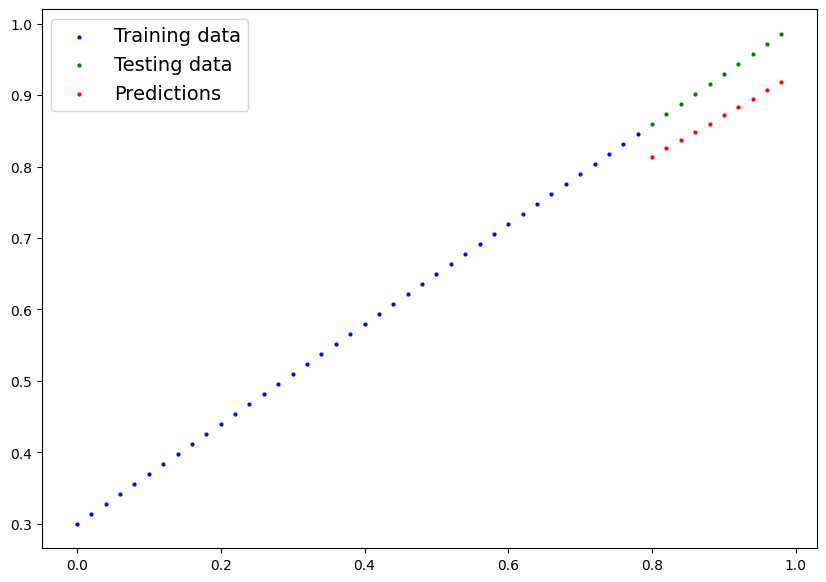

In [45]:
plot_predictions(predictions=y_preds)


In [ ]:
plot_predictions(predictions=y_preds)

## 5. Saving and Loading a PyTorch Model

If you've trained a PyTorch model, chances are you'll want to save it and export it somewhere.

As in, you might train it on Google Colab or your local machine with a GPU but you'd like to now export it to some sort of application where others can use it.

Or maybe you'd like to save your progress on a model and come back and load it back later.

For saving and loading models in PyTorch, there are three main methods you should be aware of (all of below have been taken from the [PyTorch saving and loading models guide](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference):

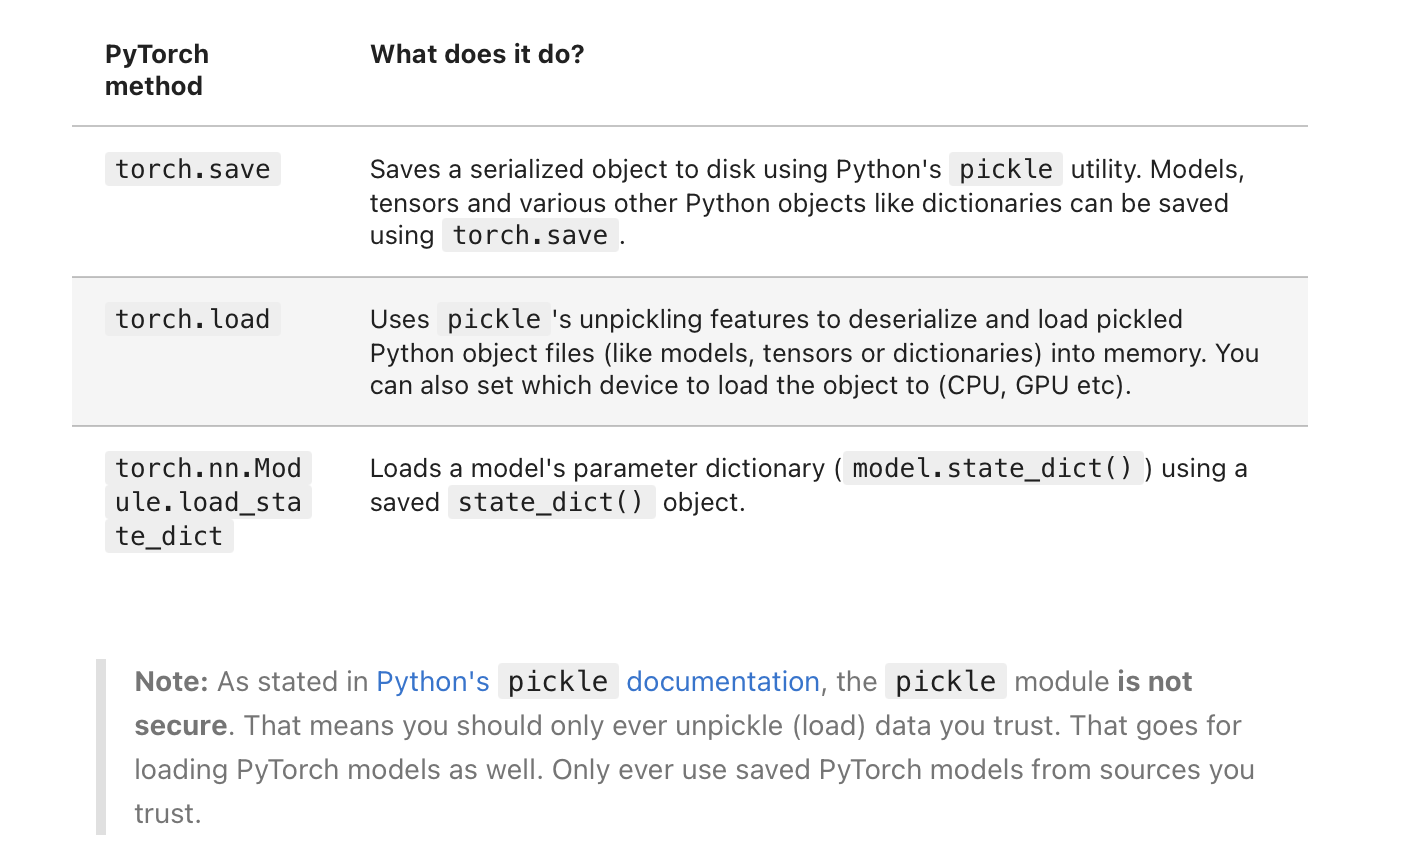

### Saving a PyTorch model's `state_dict()`

The [recommended way](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference) for saving and loading a model for inference (making predictions) is by saving and loading a model's `state_dict()`.

Let's see how we can do that in a few steps:

1. We'll create a directory for saving models to called `models` using Python's `pathlib` module.
2. We'll create a file path to save the model to.
3. We'll call `torch.save(obj, f)` where `obj` is the target model's `state_dict()` and `f` is the filename of where to save the model.

> Note: It's common convention for PyTorch saved models or objects to end with `.pt` or `.pth`, like `saved_model_01.pth`.


In [46]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [47]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 Dec 23 07:05 models/01_pytorch_workflow_model_0.pth


### Loading a saved PyTorch model's `state_dict()`

Since we've now got a saved model `state_dict()` at `models/01_pytorch_workflow_model_0.pth` we can now load it in using `torch.nn.Module.load_state_dict(torch.load(f))` where `f` is the filepath of our saved model `state_dict()`.

Why call `torch.load()` inside `torch.nn.Module.load_state_dict()`?

Because we only saved the model's `state_dict()` which is a dictionary of learned parameters and not the *entire* model, we first have to load the `state_dict()` with `torch.load()` and then pass that `state_dict()` to a new instance of our model (which is a subclass of `nn.Module`).

Why not save the entire model?

Saving the *entire model* rather than just the `state_dict()` is more intuitive, however, to quote the PyTorch documentation (italics mine):

> **"The disadvantage of this approach (*saving the whole model*) is that the serialized data is bound to the specific classes and the exact directory structure used when the model is saved...**
>
> Because of this, your code can break in various ways when used in other projects or after refactors."

So instead, we're using the flexible method of saving and loading just the `state_dict()`, which again is basically a dictionary of model parameters.

Let's test it out by created another instance of `LinearRegressionModel()`, which is a subclass of `torch.nn.Module` and will hence have the in-built method `load_state_dict()`.


In [48]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model
#(this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>


Excellent! It looks like things matched up.

Now to test our loaded model, let's perform inference with it (make predictions) on the test data.

Remember the rules for performing inference with PyTorch models?

If not, here's a refresher:

In [49]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

Now we've made some predictions with the loaded model, let's see if they're the same as the previous predictions.



In [50]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

It looks like the loaded model predictions are the same as the previous model predictions (predictions made prior to saving). This indicates our model is saving and loading as expected.

> There are more methods to save and load PyTorch models but I'll leave these for extra-curriculum and further reading. See the [PyTorch guide for saving and loading models](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-and-loading-models) for more.

## 6. Putting it all together

In [51]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu
